## Malware Classification

### Read the input data files.

In [1]:
import numpy as np
import os
XTrain = np.loadtxt('training_data.csv', skiprows=1, usecols=(1,2), delimiter=',', dtype='str')
# print XTrain[0]
XTest = np.loadtxt('test_data_public_new.csv', skiprows=1, usecols=(1,), delimiter=',',dtype='str')
# print XTest[0]
YTrain = XTrain[:,-1]
XTrain = XTrain[:,0]
print XTrain.shape
YTrain = YTrain.astype(np.int)
print type(YTrain[0]),YTrain[0],YTrain.shape
print XTest.shape

(2056,)
<type 'numpy.int64'> 10 (2056,)
(1676,)


### Removing missing values from the Train Dataset

In [2]:
import pickle,os,json
def readFile(fileName):
    return pickle.load( open( fileName, "rb" ) )

def missingTestCases(X,folder):
    missingIndices = []
    for i in xrange(X.shape[0]):
        try:
            readFile(os.getcwd()+os.path.sep+folder+os.path.sep+X[i]+'.bin')
        except IOError:
            missingIndices.append(i)
    return missingIndices

missingIndicesPEXTrain = missingTestCases(XTrain,'peinfo')
missingIndicesVTXTrain = missingTestCases(XTrain,'vt')
missingIndicesPEXTest = missingTestCases(XTest,'peinfo')
missingIndicesVTXTest = missingTestCases(XTest,'vt')
assert(cmp(missingIndicesPEXTrain,missingIndicesVTXTrain)==0)
assert(cmp(missingIndicesPEXTest,missingIndicesVTXTest)==0)
print len(missingIndicesVTXTest),len(missingIndicesPEXTrain)
newXTrain = np.delete(XTrain,missingIndicesPEXTrain)
newYTrain = np.delete(YTrain,missingIndicesPEXTrain)
print newXTrain.shape
print newYTrain.shape
# print newXTrain,missingIndices
# print missingIndicesVTXTest, missingIndicesPEXTrain
assert (not('9559a69cbcb655b3b01cabea4de61af0' in newXTrain))

0 429
(1627,)
(1627,)


### Check the format of PE Info for a sample training value for further analyis.

In [3]:
a = readFile(os.getcwd()+'/peinfo/'+XTrain[10]+'.bin')#[0]
print json.dumps(a, sort_keys=True,indent=4, separators=(',', ': '))

[
    {
        "entropy": 6.433100348280963,
        "md5": "c69726ed422d3dcfdec9731986daa752",
        "result": ".text\u0000\u0000\u0000",
        "size": 23040,
        "subtype": "pe_section",
        "virt_address": 4096,
        "virt_size": 22738
    },
    {
        "entropy": 5.179763757809359,
        "md5": "a2c7710fa66fcbb43c7ef0ab9eea5e9a",
        "result": ".rdata\u0000\u0000",
        "size": 4608,
        "subtype": "pe_section",
        "virt_address": 28672,
        "virt_size": 4496
    },
    {
        "entropy": 4.617802320695975,
        "md5": "e59cdcb732e4bfbc84cc61dd68354f78",
        "result": ".data\u0000\u0000\u0000",
        "size": 1024,
        "subtype": "pe_section",
        "virt_address": 36864,
        "virt_size": 110456
    },
    {
        "entropy": 0.0,
        "md5": "d41d8cd98f00b204e9800998ecf8427e",
        "result": ".ndata\u0000\u0000",
        "size": 0,
        "subtype": "pe_section",
        "virt_address": 147456,
        "virt_size

### Check the format of VT Info for a sample training value for further analyis.

In [4]:
b = readFile(os.getcwd()+'/vt/'+newXTrain[0]+'.bin')
print type(b)
print json.dumps(b, sort_keys=True,indent=4, separators=(',', ': '))

<type 'dict'>
{
    "ALYac": "Adware.MPLug.HH",
    "Ad-Aware": "Adware.MPLug.HH",
    "AhnLab-V3": "PUP/Win32.MultiPlug",
    "Avira": "ADWARE/MultiPlug.Gen4",
    "BitDefender": "Adware.MPLug.HH",
    "ESET-NOD32": "a variant of Win32/Adware.MultiPlug.GF",
    "Emsisoft": "Adware.MPLug.HH (B)",
    "F-Secure": "Adware.MPLug.HH",
    "GData": "Adware.MPLug.HH",
    "K7AntiVirus": "Trojan ( 0040fa761 )",
    "K7GW": "Trojan ( 0040fa761 )",
    "McAfee": "MultiPlug-FXC",
    "McAfee-GW-Edition": "BehavesLike.Win32.MultiPlug.gh",
    "MicroWorld-eScan": "Adware.MPLug.HH",
    "Panda": "Generic Suspicious",
    "Rising": "PE:Malware.XPACK-HIE/Heur!1.9C48",
    "Tencent": "Trojan.Win32.Qudamah.Gen.6",
    "VBA32": "suspected of Heur.Malware-Cryptor.Multiplug",
    "nProtect": "Adware.MPLug.HH"
}


### Analysis of frequency of Anti Viruses in VT Info

In [41]:
from tabulate import tabulate
    
VTRange = {}
folder = 'vt'
for i in xrange(newXTrain.shape[0]):
    VTInfo = readFile(os.getcwd()+os.path.sep+folder+os.path.sep+newXTrain[i]+'.bin')
    for key in VTInfo.keys():
        if key not in VTRange.keys():
            VTRange[key] = []
        VTRange[key].append(VTInfo[key])

freqAV = []
head = ['Anti Viruse Name' , 'No. of Labels' , 'No. Of Samples', 'Ratio of Samples/Labels']
                
for k in VTRange.keys():
#     print k, len(list(set(VTRange[k]))),len(VTRange[k]), len(VTRange[k])/float(len(list(set(VTRange[k]))))
#     print "{0}\t {1}\t {2}\t {3}\t".format(k, len(list(set(VTRange[k]))),len(VTRange[k]), len(VTRange[k])/float(len(list(set(VTRange[k])))))
    freqAV.append([k, len(list(set(VTRange[k]))),len(VTRange[k]), len(VTRange[k])/float(len(list(set(VTRange[k]))))])

from operator import itemgetter, attrgetter    
descSortedfreqAV = sorted(freqAV, key=itemgetter(3), reverse = True)
    
print tabulate(descSortedfreqAV, headers=head)

with open('result.json', 'w') as fp:
    json.dump(VTRange, fp,sort_keys=True,indent=4, separators=(',', ': '))

Anti Viruse Name        No. of Labels    No. Of Samples    Ratio of Samples/Labels
--------------------  ---------------  ----------------  -------------------------
Panda                              62               792                   12.7742
AVware                             64               705                   11.0156
VIPRE                              94               948                   10.0851
Symantec                           59               523                    8.86441
Antiy-AVL                         123               635                    5.1626
Qihoo-360                         133               661                    4.96992
AhnLab-V3                         159               759                    4.77358
Comodo                            147               681                    4.63265
VBA32                             143               603                    4.21678
Kingsoft                           66               261                    3.95455
Ikarus  

## Analysis of PE Info

In [7]:
'''Explanation of relevant result subtypes:
pe_section - data about different sections of the PE file
pe_resources - data about resources included in the PE file (images, icons, menus...)
pe_import - data about imported functions from DLLs
pe_timestamp - timestamp from compilation time
rich_header - part of the PE header, contains some custom data about the PE file'''
PERange = {}
PERange['pe_section']={}
PERange['pe_resource']={}
PERange['pe_import']={}
PERange['pe_timestamp']={}
PERange['rich_header']={}
relevantSubTypes = ['pe_section','pe_resource','pe_import','pe_timestamp','rich_header']

folder = 'peinfo'
for i in xrange(newXTrain.shape[0]):
    PEInfo = readFile(os.getcwd()+os.path.sep+folder+os.path.sep+newXTrain[i]+'.bin')
    for PEItem in PEInfo:
        subType = PEItem['subtype']
        if subType not in relevantSubTypes:
            continue
        for key in PEItem.keys():
            if key=='subtype':
                continue
            elif key not in PERange[subType].keys():
                PERange[subType][key] = []
            PERange[subType][key].append(PEItem[key])
with open('PEInfo_Analysis.json', 'w') as fp:
    json.dump(PERange, fp,sort_keys=True,indent=4, separators=(',', ': '))
# print json.dumps(PERange, sort_keys=True,indent=4, separators=(',', ': '))    

### Analysis of PE Info by sections

In [8]:
# print json.dumps(PERange['pe_section'], sort_keys=True,indent=4, separators=(',', ': '))
sections = ['pe_section','pe_resource','pe_import','pe_timestamp','rich_header']
def printSectionReport(PERange, section):
    print '\n'+section
    print '_'*len(section)
    for k in PERange[section].keys():
        print k, len(list(set(PERange[section][k]))),len(PERange[section][k]), len(PERange[section][k])/float(len(list(set(PERange[section][k]))))
for section in sections:
    printSectionReport(PERange,section)


pe_section
__________
entropy 3563 7382 2.07184956497
result 154 7382 47.9350649351
virt_address 658 7382 11.2188449848
virt_size 2845 7382 2.59472759227
md5 4135 7382 1.78524788392
size 928 7382 7.95474137931

pe_resource
___________
language 27 25518 945.111111111
resource_id 49 25518 520.775510204
sub_language 8 25518 3189.75
result 1 25518 25518.0
address 13448 25518 1.89753123141
size 1578 25518 16.1711026616
resource_type 1 25518 25518.0
md5 15753 25518 1.61988192725

pe_import
_________
ordinal 879 149988 170.634812287
result 6701 149988 22.3829279212
dll 187 149988 802.07486631

pe_timestamp
____________
raw 991 1624 1.63874873865
result 991 1624 1.63874873865

rich_header
___________
raw 262 846 3.22900763359
result 524 1692 3.22900763359


### Analysis of PE Info by sections into Files

In [42]:
with open('PEInfo_Analysis_pe_resource.json', 'w') as fp:
    json.dumps(PERange['pe_resource'], fp, sort_keys=True,indent=4, separators=(',', ': '))

with open('PEInfo_Analysis_pe_import.json', 'w') as fp:
    json.dumps(PERange['pe_import'], fp, sort_keys=True,indent=4, separators=(',', ': '))

with open('PEInfo_Analysis_pe_timestamp.json', 'w') as fp:
    json.dumps(PERange['pe_timestamp'], fp, sort_keys=True,indent=4, separators=(',', ': '))

with open('PEInfo_Analysis_rich_header.json', 'w') as fp:
    json.dumps(PERange['rich_header'], fp, sort_keys=True,indent=4, separators=(',', ': '))

## Classification purely on VT Info

### Creating a Binary Feature Vector Based on Anti Virus Results

In [13]:
def CreateFeatureVec(X,folder,VTInfoTaken):
    XFeatures = []
    for i in xrange(X.shape[0]):
        XFeatures.append([])
        VTInfo = readFile(os.getcwd()+os.path.sep+folder+os.path.sep+X[i]+'.bin')
        for key in VTInfoTaken:#VTInfo.keys():
            if key in VTInfo.keys():#VTInfoTaken:
    #             XTrainFeatures[i].append(VTInfo[key])
                XFeatures[i].append(1)
            else:
                XFeatures[i].append(0)
    return np.asarray(XFeatures)

### Creating a Feature Vector Based on Frequency of Anti Virus Results

In [14]:
#Classification purely on VT Info
def CreateFeatureVecFreq(X,folder,VTInfoTaken):
    XFeatures = []
    for i in xrange(X.shape[0]):
        XFeatures.append([])
        VTInfo = readFile(os.getcwd()+os.path.sep+folder+os.path.sep+X[i]+'.bin')
        for key in VTInfoTaken:#VTInfo.keys():
            if key in VTInfo.keys():#VTInfoTaken:
    #             XTrainFeatures[i].append(VTInfo[key])
#                 mean = 2.6366914849*75
                total = float(len(VTRange[key]))/len(list(set(VTRange[key])))
#                 total = len(list(set(VTRange[key])))/float(len(VTRange[key]))
                occurences = VTRange[key].count(VTInfo[key])
                if occurences == 0:
#                     print key, VTInfo[key], VTRange[key]
                    XFeatures[i].append(total)
                else:
#                 occurences = 1
                    XFeatures[i].append(total/occurences)
            else:
                XFeatures[i].append(0)
    return np.asarray(XFeatures)

### Count Null Feature Vectors

In [15]:
def countNullVectors(vector, length):
    countNulls = 0
    for i in xrange(vector.shape[0]):
#         print type(vector[i,:])
        if np.count_nonzero(vector[i]) == 0:
#             print vector[i]
            countNulls +=1
    return countNulls

### Creating a Feature Vector Based on Feature Means of PE Info

In [36]:
def CreateFeatureVecPEI(X,folder,PEInfoTaken,relevantSubTypes):
    XFeatures = []
    XFeaturesNorm = []
#     print X.shape[0]
    for i in xrange(X.shape[0]):
        XFeatures.append({})
        XFeaturesNorm.append([])
        PEInfo = readFile(os.getcwd()+os.path.sep+folder+os.path.sep+X[i]+'.bin')
        for PEItem in PEInfo:
            subType = PEItem['subtype']
            if subType not in relevantSubTypes:
                continue
            for key in PEInfoTaken:
#                 print key,subType,PEItem.keys()
                try:
                    XFeatures[i][key] 
                except KeyError:
#                     XFeatures
                    XFeatures[i][key]=[]
                if key in PEItem.keys():
#                     XFeatures[i][key].append(1)
#                     print key
                    XFeatures[i][key].append(PEItem[key])
                else:
#                     print i,key
                    XFeatures[i][key].append(0)
#         print XFeatures[i].values()[0]
#         print sum(XFeatures[i].values()[0])
#         print "len",len(XFeaturesNorm),XFeaturesNorm
#         print "len",len(XFeatures),XFeatures
#         print type(XFeatures[i].values())
#         print float(sum(XFeatures[i].values()[0]))/len(XFeatures[i].values()[0])
#         print len(XFeatures[i].values()[0])
#         XFeaturesNorm[i] = sum(XFeatures[i].values()[0])/len(XFeatures[i].values()[0])
        XFeaturesNorm[i] = sum(XFeatures[i].values()[0])/len(XFeatures[i].values()[0])#[val for sublist in XFeatures[i].values() for val in sublist]
#         XFeaturesNorm[i] = sum(XFeaturesNorm[i])/len(XFeaturesNorm[i])
#     for i in xrange(X.shape[0]):
#         XFeatures.append([])
#         VTInfo = readFile(os.getcwd()+os.path.sep+folder+os.path.sep+X[i]+'.bin')
#         for key in VTInfoTaken:#VTInfo.keys():
#             if key in VTInfo.keys():#VTInfoTaken:
#     #             XTrainFeatures[i].append(VTInfo[key])
#                 XFeatures[i].append(1)
#             else:
#                 XFeatures[i].append(0)
#     print "Len",len(XFeaturesNorm)
    newFeatures = np.asarray(XFeaturesNorm)
#     print newFeatures.shape
    return np.reshape(newFeatures,(newFeatures.shape[0],len(PEInfoTaken)))
# relevantSubTypes = ['pe_section']#,'pe_resource']
# folder = 'peinfo'
# PEInfoTaken = ['entropy']#, 'language','resource_id']
# XTrainFeatures = CreateFeatureVecPEI(newXTrain[0:3],folder,PEInfoTaken,relevantSubTypes)
# print XTrainFeatures
# print XTrainFeatures.shape
# relevantSubTypes = ['pe_resource']
# PEInfoTaken = ['language']#, 'resource_id']
# # XTrainFeaturesPE1 = CreateFeatureVecPEI(newXTrain[0:8],folder,PEInfoTaken,relevantSubTypes)
# print XTrainFeaturesPE1
# print XTrainFeaturesPE1.shape
# print newXTrain[7]
# a = readFile(os.getcwd()+'/peinfo/'+newXTrain[7]+'.bin')#[0]
# print json.dumps(a, sort_keys=True,indent=4, separators=(',', ': '))

### Analyse the results of each Anti-Virus against the classification labels.

In [17]:
def AnalyseAntiVirusLabelContribution(X,folder,VTInfoTaken):
    from collections import Counter
    XFeatures = []
    for i in xrange(X.shape[0]):
        VTInfo = readFile(os.getcwd()+os.path.sep+folder+os.path.sep+X[i]+'.bin')
        for key in VTInfoTaken:
            if key in VTInfo.keys():
                XFeatures.append((VTInfo[key], newYTrain[i]))
            else:
                pass
    return Counter(XFeatures)

folder = 'vt'
VTInfoTaken = [u'Symantec'] # ['Panda', 'AVware', 'VIPRE', 'Symantec']
XTrainFeatures = AnalyseAntiVirusLabelContribution(newXTrain,folder,VTInfoTaken)
print XTrainFeatures

Counter({(u'WS.Reputation.1', 10): 205, (u'Trojan.Gen.2', 10): 46, (u'PUA.Gen.2', 0): 31, (u'Trojan.Gen', 10): 28, (u'WS.Reputation.1', 5): 23, (u'WS.Reputation.1', 0): 22, (u'Trojan.Zbot', 10): 14, (u'Backdoor.Trojan', 10): 9, (u'Suspicious.Cloud.5', 10): 8, (u'WS.Reputation.1', 1): 8, (u'SoftwareVersionUpdater', 0): 7, (u'Trojan.Gen.2', 0): 7, (u'Infostealer.Limitail', 10): 6, (u'Trojan Horse', 10): 6, (u'Trojan.Gen.2', 8): 5, (u'W32.Wapomi!inf', 10): 5, (u'Hacktool.Rootkit', 10): 4, (u'Infostealer', 10): 4, (u'W32.Pinfi.B', 10): 4, (u'Downloader', 10): 4, (u'W32.Neshuta', 10): 3, (u'Spyware.Ardakey', 10): 3, (u'PUA.Downloader', 10): 3, (u'Trojan.Gen', 8): 3, (u'Adware.CPush', 10): 3, (u'Trojan.Asprox.B', 10): 3, (u'Downloader.Ponik', 10): 2, (u'WinZipper', 10): 2, (u'Infostealer.Napolar', 10): 2, (u'WS.Reputation.1', 8): 2, (u'Downloader.Upatre', 10): 2, (u'Trojan.Dropper', 10): 2, (u'Trojan.Fareit!gm', 10): 2, (u'Trojan.Gen.SMH', 10): 2, (u'WS.Reputation.1', 7): 2, (u'W32.Spyrat', 

### Analyse the results of each Anti-Virus.

In [18]:
def AnalyseAntiVirusContribution(X,folder,VTInfoTaken):
    from collections import Counter
    XFeatures = []
    for i in xrange(X.shape[0]):
        VTInfo = readFile(os.getcwd()+os.path.sep+folder+os.path.sep+X[i]+'.bin')
        for key in VTInfoTaken:
            if key in VTInfo.keys():
                XFeatures.append((VTInfo[key]))
            else:
                pass
    return Counter(XFeatures)

folder = 'vt'
VTInfoTaken = [u'Symantec'] # ['Panda', 'AVware', 'VIPRE', 'Symantec']
XTrainFeatures = AnalyseAntiVirusContribution(newXTrain,folder,VTInfoTaken)
print XTrainFeatures

Counter({u'WS.Reputation.1': 265, u'Trojan.Gen.2': 59, u'PUA.Gen.2': 32, u'Trojan.Gen': 31, u'Trojan.Zbot': 14, u'Backdoor.Trojan': 9, u'Suspicious.Cloud.5': 8, u'SoftwareVersionUpdater': 7, u'Trojan Horse': 6, u'Infostealer.Limitail': 6, u'PUA.Downloader': 5, u'W32.Wapomi!inf': 5, u'W32.Pinfi.B': 4, u'Hacktool.Rootkit': 4, u'Infostealer': 4, u'Downloader': 4, u'Trojan.Asprox.B': 3, u'Adware.CPush': 3, u'Spyware.Ardakey': 3, u'W32.Neshuta': 3, u'Trojan.Gen.SMH': 2, u'Trojan.Dropper': 2, u'Backdoor.Graybird': 2, u'W32.Spyrat': 2, u'Trojan.Fareit!gm': 2, u'Downloader.Upatre': 2, u'Infostealer.Napolar': 2, u'WinZipper': 2, u'Downloader.Ponik': 2, u'Backdoor.Salgorea': 1, u'MyPCBackup': 1, u'Trojan.ADH': 1, u'SecurityRisk.BL': 1, u'Packed.Vmpbad!gen4': 1, u'Trojan.Gen.SMH.2': 1, u'W32.Spybot.Worm': 1, u'Downloader.MisleadApp': 1, u'Bloodhound.Exploit.1': 1, u'W32.SillyDC': 1, u'Trojan.Packed.16': 1, u'W32.Extrat': 1, u'Adware.BL': 1, u'W32.Pinfi': 1, u'Trojan.Daekom': 1, u'W32.Pykspa.D': 1

### Sample code after considering 4 Anti Viruses and few results from each one of them as features

In [19]:
# Limited One Hot Encoding of Features of each Anti Virus - Classification purely on VT Info
folder = 'vt'

# Just consider the top 4 anti viruses
VTInfoTaken = ['Panda','AVware','VIPRE','Symantec']

# The values for these 4 anti virses are one hot encoded based on the frequency and rarity of occurence.
PandaValues = ['Adware/SaveShare', 'Generic Malware', 'Trj/CI.A', 'PUP/Somoto', 'Adware/Firseria','Suspicious file', 'PUP/InstallMonstr']
AVwareValues = ['Backdoor.MSIL.Bladabindi.a (v)', 'Trojan.Win32.Fareit.gi (v)', 'DownloadMR (fs)']
VIPREValues = ['Trojan.MSIL.Agent.ko (v)', 'JustPlugIt (fs)', 'Backdoor.MSIL.Bladabindi.a (v)', 'DownloadMR (fs)', 'InstallPath (fs)']
SymantecValues = ['SoftwareVersionUpdater', 'PUA.Downloader', 'Trojan.Asprox.B!gm', 'PUA.Downloader']

def createLtdOHEonAVFeaturesVecOld(X,folder,VTInfoTaken):
    XFeatures = []
    for i in xrange(X.shape[0]):
        XFeatures.append([])
        VTInfo = readFile(os.getcwd()+os.path.sep+folder+os.path.sep+X[i]+'.bin')
        for key in VTInfoTaken:
            if key in VTInfo.keys():
                if key == 'Panda':
                    if VTInfo[key] in PandaValues:
                        XFeatures[i].append(PandaValues.index(VTInfo[key]))
                    else:
                        XFeatures[i].append(7)
                elif key == 'AVware':
                    if VTInfo[key] in AVwareValues:
                        XFeatures[i].append(AVwareValues.index(VTInfo[key]))
                    else:
                        XFeatures[i].append(3)
                elif key == 'VIPRE':
                    if VTInfo[key] in VIPREValues:
                        XFeatures[i].append(VIPREValues.index(VTInfo[key]))
                    else:
                        XFeatures[i].append(5)
                elif key == 'Symantec':
                    if VTInfo[key] in SymantecValues:
                        XFeatures[i].append(SymantecValues.index(VTInfo[key]))
                    else:
                        XFeatures[i].append(4)
            else:
                XFeatures[i].append(0)
    return np.asarray(XFeatures)


### Function for Limited One Hot Encoding of Features of each Anti Virus - Classification purely on VT Info

In [20]:
def createLtdOHEonAVFeaturesVec(X,folder,VTInfoTaken, VTInfoTakenValues, topNFreqFeatures):
    XFeatures = []
    for i in xrange(X.shape[0]):
        XFeatures.append([])
        VTInfo = readFile(os.getcwd()+os.path.sep+folder+os.path.sep+X[i]+'.bin')
        for key in VTInfoTaken:
            if key in VTInfo.keys():
                if key in VTInfoTaken:
                    if VTInfo[key] in VTInfoTakenValues:
                        XFeatures[i].append(VTInfoTakenValues.index(VTInfo[key]) + 1)
                    else:
                        XFeatures[i].append(topNFreqFeatures + 1)
            else:
                XFeatures[i].append(0)
    return np.asarray(XFeatures)


### Get the important features based on the frequency of occurence across different Anti-Virus

In [21]:
def getFeatureFeqAV(X, folder, noOfAntiVirus, topNFreqFeatures):
    VTInfoTakenValues = []
    XFeatures = []
    
    # Get the top most frequent Anti Viruses based on the input parameter noOfAntiVirus
    for i in xrange(newXTrain.shape[0]):
        VTInfo = readFile(os.getcwd()+os.path.sep+folder+os.path.sep+newXTrain[i]+'.bin')
        for key in VTInfo.keys():
            if key not in VTRange.keys():
                VTRange[key] = []
            VTRange[key].append(VTInfo[key])
            
    freqAntiVirus = []
    for k in VTRange.keys():
        freqAntiVirus += [(k, len(list(set(VTRange[k]))),len(VTRange[k]), len(VTRange[k])/float(len(list(set(VTRange[k])))))]

    from operator import itemgetter, attrgetter    
    descSortedFreqAntiVirus = sorted(freqAntiVirus, key=itemgetter(3), reverse = True)
    
    # Select the top most frequent Anti Viruses
    VTInfoTaken = [x[0] for x in descSortedFreqAntiVirus[0:noOfAntiVirus]]
    #print VTInfoTaken
    
    VTInfoTakenValues = []
    for i in xrange(noOfAntiVirus):
        countXTrainFeatures = AnalyseAntiVirusContribution(X,folder,[VTInfoTaken[i]])
        descSortedXTrainFeatures = sorted(countXTrainFeatures, key=itemgetter(1), reverse = True)
        topNFreqXTrainFeatures = [x[0] for x in descSortedXTrainFeatures[0:topNFreqFeatures]]
        VTInfoTakenValues.append(topNFreqXTrainFeatures)
        
    
    XFeatures = createLtdOHEonAVFeaturesVec(X,folder,VTInfoTaken, VTInfoTakenValues, topNFreqFeatures)
    return XFeatures

In [22]:
XFeatures = getFeatureFeqAV(newXTrain, 'vt', 10, 10)
print XFeatures

[[11  0  0 ...,  0 11  0]
 [11 11 11 ...,  0 11  0]
 [ 0  0  0 ...,  0 11  0]
 ..., 
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0 11  0]
 [11  0 11 ..., 11 11 11]]


### Use different classifiers to train the model.

In [23]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# def classifyRandomForestClassifier(XTrain, XTest, YTrain, YTest,trees=100,crit='gini'):
def classifyRandomForestClassifier(XTrain, XTest, YTrain, YTest):
    clf = RandomForestClassifier(n_estimators=200,criterion='entropy')
    clf.fit(XTrain, YTrain)
    YPred = clf.predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)

In [24]:
#Multi Class SVM
from sklearn import svm
from sklearn.svm import NuSVC
def classifyMultiClassSVMClassifier(XTrain, XTest, YTrain, YTest):
    YPred = svm.SVC(kernel='linear').fit(XTrain, YTrain).predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)

In [25]:
#K Nearest Neighbours Classifier
from sklearn.neighbors import KNeighborsClassifier
def classifyKNNClassifier(XTrain, XTest, YTrain, YTest):
    neigh = KNeighborsClassifier(n_neighbors=3)
    YPred = neigh.fit(XTrain, YTrain).predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)

### Stratified K Fold Cross Validation

In [26]:
from sklearn.cross_validation import StratifiedKFold
def stratifiedKFoldVal(XTrain, YTrain, classify):
    n_folds = 5
    score = 0.0
    skf = StratifiedKFold(YTrain, n_folds)
    for train_index, test_index in skf:
        X_train, X_test = XTrain[train_index], XTrain[test_index]
        y_train, y_test = YTrain[train_index], YTrain[test_index]
        score += classify(X_train, X_test,  y_train, y_test)
    return score/n_folds

### Write Predicted Output Labels to File

In [27]:
def writePrdictedLabelFile(YPred):
    f = open("Predictions.csv","w")
    f.write("Id,Label" + "\n")
    for i in xrange(len(YPred)):
        f.write(str(i) + "," + str(int(YPred[i]))+ "\n")
    f.close()

In [28]:
folder = 'vt'
VTInfoTaken = ['Panda','AVware','VIPRE','Symantec','Antiy-AVL','Qihoo-360','AhnLab-V3', \
               'Avast','Kaspersky','ESET-NOD32','McAfee','BitDefender']
XTrainFeatures = CreateFeatureVec(newXTrain,folder,VTInfoTaken)
XTestFeatures = CreateFeatureVec(XTest,folder,VTInfoTaken)
print XTestFeatures.shape, XTestFeatures[0]
print XTrainFeatures.shape,XTrainFeatures[0]
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier)
print score
clf = RandomForestClassifier(n_estimators=200,criterion='entropy')
clf.fit(XTrainFeatures, newYTrain)
YPred = clf.predict(XTestFeatures)
writePrdictedLabelFile(YPred)

(1676, 12) [1 0 1 0 1 1 1 1 0 1 1 0]
(1627, 12) [1 0 0 0 0 0 1 0 0 1 1 1]
84.0240514219


### Features based on Limited One Hot Encoding of Features of each Anti Virus - Classification purely on VT Info

In [29]:
folder = 'vt'
VTInfoTaken = ['Panda','AVware','VIPRE','Symantec']

XTrainFeatures = createLtdOHEonAVFeaturesVecOld(newXTrain,folder,VTInfoTaken)
XTestFeatures = createLtdOHEonAVFeaturesVecOld(XTest,folder,VTInfoTaken)

print XTestFeatures.shape, XTestFeatures[0]
print XTrainFeatures.shape,XTrainFeatures[0]
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier)
print score

clf = RandomForestClassifier(n_estimators=200,criterion='entropy')
clf.fit(XTrainFeatures, newYTrain)
YPred = clf.predict(XTestFeatures)
writePrdictedLabelFile(YPred)

(1676, 4) [7 0 5 0]
(1627, 4) [7 0 0 0]
76.4041699589


### Features based on Limited One Hot Encoding on Features of each Anti Virus - <br> Classification purely on VT Info

In [30]:
folder = 'vt'
noOfAntiVirus = 60
topNFreqFeatures = 10

XTrainFeatures = getFeatureFeqAV(newXTrain, folder, noOfAntiVirus, topNFreqFeatures)
print XTrainFeatures.shape,XTrainFeatures[0]

XTestFeatures = getFeatureFeqAV(XTest, folder, noOfAntiVirus, topNFreqFeatures)
print XTestFeatures.shape, XTestFeatures[0]

score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier)
print score

clf = RandomForestClassifier(n_estimators=200,criterion='entropy')
clf.fit(XTrainFeatures, newYTrain)
YPred = clf.predict(XTestFeatures)
writePrdictedLabelFile(YPred)

(1627, 60) [11  0  0  0  0  0 11  0 11  0  0  0  0  0  0 11  0  0  0  0 11 11  0 11  0
 11 11  0  0  0  0  0  0  0  0  0  0  0  0  0 11 11 11  0 11 11 11 11  0  0
 11  0  0 11  0  0  0  0  0  0]
(1676, 60) [11  0 11  0 11 11 11  0 11 11  0 11  0  0  0 11  0  0  0  0  0  0  0  0  0
  0 11 11 11  0  0 11  0 11  0  0  0 11  0  0 11  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0]
95.0875546874


### Classification on Binary VT Info Feature Vectors

In [37]:
folder = 'vt'
VTInfoTaken = VTRange.keys()
XTrainFeatures = CreateFeatureVec(newXTrain,folder,VTInfoTaken)
XTestFeatures = CreateFeatureVec(XTest,folder,VTInfoTaken)
print XTestFeatures.shape, XTestFeatures[0]
print XTrainFeatures.shape,XTrainFeatures[0]
print countNullVectors(XTrainFeatures, len(VTInfoTaken))
print countNullVectors(XTestFeatures, len(VTInfoTaken))

score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier)
print score
clf = RandomForestClassifier(n_estimators=200,criterion='entropy')
clf.fit(XTrainFeatures, newYTrain)
YPred = clf.predict(XTestFeatures)
writePrdictedLabelFile(YPred)

(1676, 75) [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0
 1]
(1627, 75) [0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0
 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 0]
0
0
95.2092983511


### Classification on VT Info Feature Vectors Based on Frequency

In [38]:
folder = 'vt'
VTInfoTaken = ['Panda','AVware','VIPRE','Symantec','Antiy-AVL','Qihoo-360','AhnLab-V3', \
               'Avast','Kaspersky','ESET-NOD32','McAfee','BitDefender']
VTInfoTaken = VTRange.keys()
XTrainFeatures = CreateFeatureVecFreq(newXTrain,folder,VTInfoTaken)
XTestFeatures = CreateFeatureVecFreq(XTest,folder,VTInfoTaken)
print XTestFeatures.shape, XTestFeatures[0]
print XTrainFeatures.shape,XTrainFeatures[0]
print countNullVectors(XTrainFeatures, len(VTInfoTaken))
print countNullVectors(XTestFeatures, len(VTInfoTaken))

score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier)
print score
clf = RandomForestClassifier(n_estimators=200,criterion='entropy')
clf.fit(XTrainFeatures, newYTrain)
YPred = clf.predict(XTestFeatures)
writePrdictedLabelFile(YPred)

(1676, 75) [ 0.          0.          0.          0.          0.          0.          0.
  0.          4.27876106  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.06423034  0.          0.
  0.          0.03456186  0.          0.          0.18593272  0.          0.
  0.          0.          0.          0.          0.          0.03386322
  0.          0.          0.          0.          0.0293808   0.01732836
  0.          0.          6.98136646  0.          0.          0.          0.
  0.09348199  0.          0.05492129  0.05569782  0.          0.          0.
  0.          0.          0.          0.          0.0636478   0.          0.
  0.11713287  0.          0.          0.          0.          0.          0.
  0.          0.          0.15833333  0.09387967  0.03598364  0.
  0.15531015]
(1627, 75) [ 0.          0.          0.          0.55917313  0.52332196  0.          0.
  0.          0.26742257  0.          0.          0.        

### Normalisation of Feature Vectors

In [33]:
# from numpy import linalg as LA
# XTestFeaturesNorm = LA.norm(XTestFeatures, axis=1)
# XTrainFeaturesNorm = LA.norm(XTrainFeatures, axis=1)
from sklearn import preprocessing
XTestFeaturesNorm = preprocessing.normalize(XTestFeatures, norm='l2')
XTrainFeaturesNorm = preprocessing.normalize(XTrainFeatures, norm='l2')
print XTrainFeaturesNorm.shape,XTestFeaturesNorm.shape,XTrainFeaturesNorm[0],XTestFeaturesNorm[0]

(1627, 75) (1676, 75) [ 0.          0.          0.          0.15655009  0.14651294  0.          0.
  0.          0.07486953  0.          0.          0.          0.
  0.20997534  0.          0.21371704  0.          0.          0.          0.
  0.          0.          0.75474238  0.          0.          0.          0.
  0.          0.          0.15511692  0.          0.          0.
  0.05866114  0.15906545  0.          0.          0.1605028   0.          0.
  0.          0.          0.12215957  0.          0.15393691  0.          0.
  0.          0.03977282  0.          0.          0.          0.          0.
  0.          0.15373841  0.          0.          0.0381842   0.20983221
  0.          0.16865152  0.          0.          0.          0.
  0.26605361  0.          0.          0.          0.          0.
  0.04361408  0.          0.        ] [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.52202764  0.          0.          0.          0.    

### Classification on combination of VT Info Feature Vectors Based on Frequency & PE Info Entropies

In [39]:
folder = 'vt'
VTInfoTaken = ['Panda','AVware','VIPRE','Symantec','Antiy-AVL','Qihoo-360','AhnLab-V3', \
               'Avast','Kaspersky','ESET-NOD32','McAfee','BitDefender']
VTInfoTaken = VTRange.keys()
XTrainFeatures = CreateFeatureVecFreq(newXTrain,folder,VTInfoTaken)
XTestFeatures = CreateFeatureVecFreq(XTest,folder,VTInfoTaken)
print XTestFeatures.shape, XTestFeatures[0]
print XTrainFeatures.shape,XTrainFeatures[0]
print countNullVectors(XTrainFeatures, len(VTInfoTaken))
print countNullVectors(XTestFeatures, len(VTInfoTaken))

folder = 'peinfo'
relevantSubTypes = ['pe_section']
PEInfoTaken = ['entropy']
XTrainFeaturesPE = CreateFeatureVecPEI(newXTrain,folder,PEInfoTaken,relevantSubTypes)
XTestFeaturesPE = CreateFeatureVecPEI(XTest,folder,PEInfoTaken,relevantSubTypes)
print XTestFeaturesPE.shape, XTestFeaturesPE[0]
print XTrainFeaturesPE.shape,XTrainFeaturesPE[0]
print countNullVectors(XTrainFeaturesPE, len(VTInfoTaken))
print countNullVectors(XTestFeaturesPE, len(VTInfoTaken))

# relevantSubTypes = ['pe_resource']
# PEInfoTaken = ['language', 'resource_id']
# XTrainFeaturesPE1 = CreateFeatureVecPEI(newXTrain,folder,PEInfoTaken,relevantSubTypes)
# XTestFeaturesPE1 = CreateFeatureVecPEI(XTest,folder,PEInfoTaken,relevantSubTypes)
# print XTestFeaturesPE1.shape, XTestFeaturesPE1[0]
# print XTrainFeaturesPE1.shape,XTrainFeaturesPE1[0]
# print countNullVectors(XTrainFeaturesPE1, len(VTInfoTaken))
# print countNullVectors(XTestFeaturesPE1, len(VTInfoTaken))

XTrainClf = np.concatenate((XTrainFeatures, XTrainFeaturesPE), axis=1)
XTestClf = np.concatenate((XTestFeatures, XTestFeaturesPE), axis=1)
print XTrainClf[0],XTestClf[0]
print XTrainClf.shape, XTestClf.shape
score = stratifiedKFoldVal(XTrainClf, newYTrain, classifyRandomForestClassifier)
print score
clf = RandomForestClassifier(n_estimators=200,criterion='entropy')
clf.fit(XTrainClf, newYTrain)
YPred = clf.predict(XTestClf)
writePrdictedLabelFile(YPred)

(1676, 75) [ 0.          0.          0.          0.          0.          0.          0.
  0.          4.27876106  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.06423034  0.          0.
  0.          0.03456186  0.          0.          0.18593272  0.          0.
  0.          0.          0.          0.          0.          0.03386322
  0.          0.          0.          0.          0.0293808   0.01732836
  0.          0.          6.98136646  0.          0.          0.          0.
  0.09348199  0.          0.05492129  0.05569782  0.          0.          0.
  0.          0.          0.          0.          0.0636478   0.          0.
  0.11713287  0.          0.          0.          0.          0.          0.
  0.          0.          0.15833333  0.09387967  0.03598364  0.
  0.15531015]
(1627, 75) [ 0.          0.          0.          0.55917313  0.52332196  0.          0.
  0.          0.26742257  0.          0.          0.        

### Graphs depicting Categorization Accuracy scores on KFold Stratified Validation on Train data for:
### 1. PE Info <br></br> 2. VTInfo and  <br></br> 3. Both PE Info & VTInfo

### Plotting the Classification scores based on the Number & Results in Anti Viruses
<br> X Axis - represents Number of Anti Viruses (75 in Total)
<br> Y Axis - represents Results in each of those Anti Viruses (904 in Total)
<br> Z Axis - represents Percentage of Categorization Accuracy

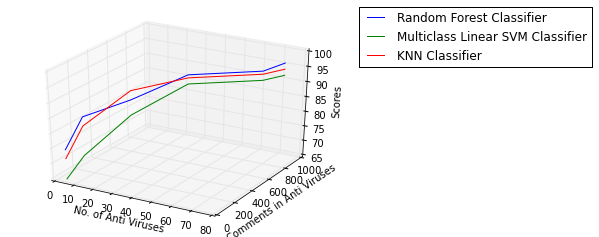

In [35]:
scoreRandomForestClassifier = [75.147, 85.147, 89.147, 94.147, 95.147, 97.147]
scoreMultiClassSVMClassifier = [65.147, 72.147, 84.147, 91.147, 92.147, 93.147]
scoreKNNClassifier = [72.147, 82.147, 92.147, 93.147, 94.147, 95.147]

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

%matplotlib inline

fig = plt.figure()
ax = fig.gca(projection='3d')

xVal = [5, 10, 25, 40, 68, 75]
yVal = [10, 100, 300, 600, 814, 904]

# fig = plt.figure()
# ax = Axes3D(fig)

ax.plot(xs=xVal, ys=yVal, zs=scoreRandomForestClassifier, label = "Random Forest Classifier")
ax.plot(xs=xVal, ys=yVal, zs=scoreMultiClassSVMClassifier, label = "Multiclass Linear SVM Classifier")
ax.plot(xs=xVal, ys=yVal, zs=scoreKNNClassifier, label = "KNN Classifier")

ax.set_xlabel('No. of Anti Viruses')
ax.set_ylabel('Comments in Anti Viruses')
ax.set_zlabel('Scores')

# Place a legend to the right of this smaller figure.
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

TO DO
<br> Run it below Last Plot
<br> Plots for VTInfo-Binary,Freq
<br> Plots for PEInfo
<br> Plots for Combination
Classifiers:
KNN, Multiclass SVM, Random Forest
